In [1]:
#Importamos las  librerías necesarias
import pandas as pd
import numpy as np
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Paso 1: Leemos el Dataset

In [2]:
dataset_estadisticas_definitivo = pd.read_csv(r"https://raw.githubusercontent.com/PabloLedo97/Datasets-Master-Big-Data/main/DatasetDefinitivo_Pablo_Ledo.csv",sep=";",encoding='latin-1');
dataset_estadisticas_definitivo

,Equipo,Local/Visitante,Goles_Locales,Suma_Goles_Locales_Acumulados,Media_Goles_Locales,Goles_Visitantes,Suma_Goles_Visitantes_Acumulados,Media_Goles_Visitantes,Puntos_Locales,Media_Puntos_Locales,Puntos_Locales_Acumulados,Puntos_Visitantes,Media_Puntos_Visitantes,Puntos_Visitantes_Acumulados,Resultados,Fecha,Temporada
0,Málaga,Local,0,0,"1,37",0,0,0,1,"1,58",1,0,0,0,x,21/08/2015,2015/2016
1,Sevilla,Visitante,0,0,0,0,0,"0,68",0,0,0,1,"0,47",1,x,21/08/2015,2015/2016
2,Atlético,Local,1,1,"1,74",0,0,0,3,"2,53",3,0,0,0,1,22/08/2015,2015/2016
3,Las Palmas,Visitante,0,0,0,0,0,"1,05",0,0,0,0,"0,79",0,1,22/08/2015,2015/2016
4,Espanyol,Local,1,1,"1,16",0,0,0,3,"1,68",3,0,0,0,1,22/08/2015,2015/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,Villarreal,Visitante,0,0,0,2,20,"1,21",0,0,0,3,"1,21",23,2,22/05/2022,2021/2022
5316,R. Sociedad,Local,1,16,"0,84",0,0,0,0,"1,84",33,0,0,0,2,22/05/2022,2021/2022
5317,Atlético,Visitante,0,0,0,2,32,"1,68",0,0,0,3,"1,58",30,2,22/05/2022,2021/2022
5318,Sevilla,Local,1,36,"1,89",0,0,0,3,"2,21",40,0,0,0,1,22/05/2022,2021/2022


### Paso 2: Definimos  la matriz de entrenamiento y el conjunto de prueba

In [3]:
#Definimos las columnas del dataset que van a participar en la matriz
#Generamos la matriz
matriz =dataset_estadisticas_definitivo.drop(columns=['Resultados','Fecha','Equipo','Local/Visitante','Temporada','Media_Goles_Locales','Media_Goles_Visitantes','Media_Puntos_Locales','Media_Puntos_Visitantes'])


#Generamos el vector con el conjunto de datos que queremos predecir
vector = dataset_estadisticas_definitivo.Resultados.tolist()

### Paso 3: División de los datos en conjunto de entrenamiento y test

In [4]:
#Conjunto de entrenamiento
X_train = matriz
y_train = vector

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size= 0.2,random_state = 123)

### Paso 4:  Definición Modelo

In [5]:
modelo = LogisticRegression(max_iter = 500,solver="liblinear")

### Paso 5:  Entrenamiento del Modelo

In [6]:
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

### Paso 6: Realizamos la predicción

In [7]:
predicciones = modelo.predict(X = X_test)
predicciones

array(['1', '1', '1', ..., '1', 'x', '1'], dtype='<U1')

### Paso 7: Evaluación modelo

#### Cálculo accuracy

In [8]:
scores = cross_val_score(modelo, matriz,vector)
print(f"El accuracy de test es: {100 * scores.mean()} %")

El accuracy de test es: 82.87593984962406 %


#### Cálculo Matriz de Confusión

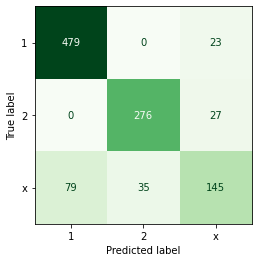

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_predictions(y_test,predicciones,display_labels = modelo.classes_,colorbar = False,cmap = 'Greens')




#### Clasification Report

In [10]:
from sklearn.metrics import classification_report

reporte_clasificacion = classification_report(y_test, predicciones)

print(reporte_clasificacion)

              precision    recall  f1-score   support

           1       0.86      0.95      0.90       502
           2       0.89      0.91      0.90       303
           x       0.74      0.56      0.64       259

    accuracy                           0.85      1064
   macro avg       0.83      0.81      0.81      1064
weighted avg       0.84      0.85      0.84      1064

